# ENEL 649 Project
Name: Deep Vyas</br>
UCID: 30139014</br>
Course: Random Variables and Stochastic Processes</br>

In [2]:
# Project Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Common Distributions 
1. Exponential Distribution
2. Normal Distribution
3. Custom Exponential Distribution 

In [3]:
# 1 Exponential Distribution
def exp_f(x, lam):
    return lam*np.exp(-lam*x)

# 2 Normal Distribution
def normal_dist(x , mean , sd):
    prob_density = 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sd**2))
    return prob_density

# 3 Custom Exponential Distribution
# Used in Problem 5,6,7
def exp_f1(x, a):
    return np.exp(-a*x)



## Problem 1:
Generate 100,000 samples of an exponentially distributed random variable with a mean
of 8. Generate a histogram of these samples, normalize to have the same area as a
PDF. Plot your histogram and the theoretical PDF function together on the same
figure. They should match.


Samples:  [1.02888482e-01 2.26714932e-05 3.33865870e-02 ... 3.96021451e-02
 3.50989213e-01 9.13711548e-02]
Total Area: 0.9999999999999999


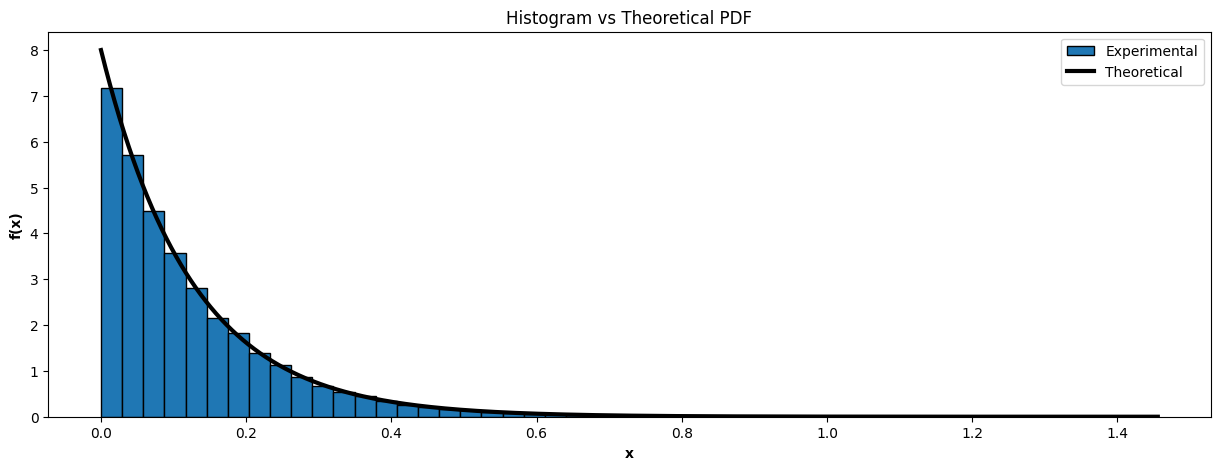

In [4]:
# Generate 100,000 samples of an exponentially distributed random variable with a mean of 8.
mean = 8        # Lamda
samples_count = 100000
total_bins = 50

samples_arr = np.random.exponential(scale=1/mean, size=samples_count)
print("Samples: ", samples_arr)

fig, axs = plt.subplots(1, 1, figsize=(15, 5))

values, bins, _ = axs.hist(x=samples_arr, bins=total_bins, density=True, edgecolor='black', linewidth=1, label="Experimental")
# print(sum(values))
area = sum(np.diff(bins)*values)
print("Total Area:", area)

x = np.linspace(np.min(samples_arr), np.max(samples_arr), samples_count)
axs.plot(x, exp_f(x, 8), color='black', linewidth=3, label="Theoretical")
axs.set_xlabel('x', fontweight ='bold')
axs.set_ylabel('f(x)', fontweight ='bold')
axs.legend()

plt.title("Histogram vs Theoretical PDF")
plt.style.use('fivethirtyeight')
plt.show()

## Problem 2:

Generate 100,000 samples of the sum of 2, 6 and 50 exponentially distributed random
variables, each with a mean of 6. Create histograms of each sum, normalize to have the
same area as a PDF and plot. For each distribution, choose the number of histogram
bins that produce plots that clearly show the shape of the distribution.

Total Area: 0.9999999999999996
Total Area: 0.9999999999999998
Total Area: 1.0


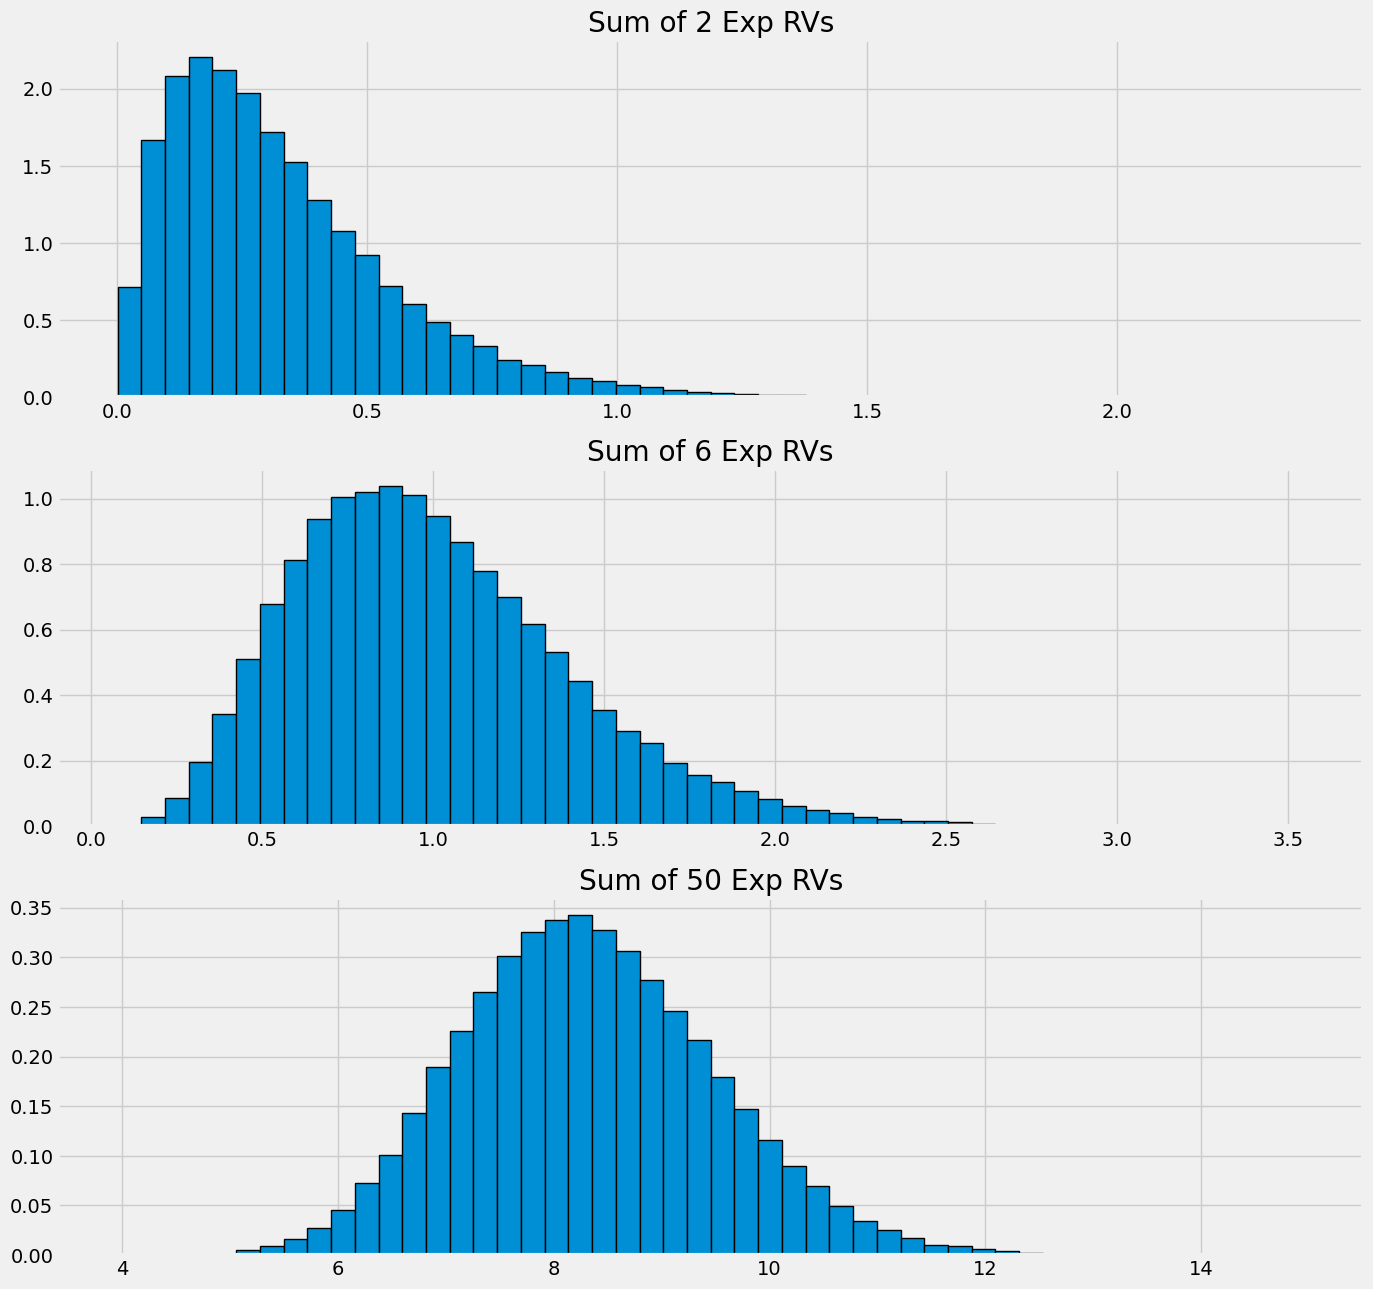

In [5]:
from matplotlib.pyplot import title


mean = 6
samples_count = 100000
total_bins = 50

# Sum of 2 exponentially distributed random variables
samples_arr_2 = 0
for counter in range(2):
    samples_arr_2 = samples_arr_2 + np.random.exponential(scale=1/mean, size=samples_count)

# Sum of 6 exponentially distributed random variables
samples_arr_6 = 0
for counter in range(6):
    samples_arr_6 = samples_arr_6 + np.random.exponential(scale=1/mean, size=samples_count)

# Sum of 50 exponentially distributed random variables
samples_arr_50 = 0
for counter in range(50):
    samples_arr_50 = samples_arr_50 + np.random.exponential(scale=1/mean, size=samples_count)

fig, axs = plt.subplots(3, 1, figsize=(15, 15))

values, bins, _ = axs[0].hist(x=samples_arr_2, bins=total_bins, density=True, edgecolor='black', linewidth=1)
area = sum(np.diff(bins)*values)
print("Total Area:", area)
values, bins, _ = axs[1].hist(x=samples_arr_6, bins=total_bins, density=True, edgecolor='black', linewidth=1)
area = sum(np.diff(bins)*values)
print("Total Area:", area)
values, bins, _ = axs[2].hist(x=samples_arr_50, bins=total_bins, density=True, edgecolor='black', linewidth=1)
area = sum(np.diff(bins)*values)
print("Total Area:", area)
axs[0].set_title("Sum of 2 Exp RVs")
axs[1].set_title("Sum of 6 Exp RVs")
axs[2].set_title("Sum of 50 Exp RVs")

plt.style.use('fivethirtyeight')
plt.show()
    

In [6]:
def merge_bins(bins_mid, samples, samples_count, isNormalized=True):
    #Here Samples are Normalized to samples_count
    # #We need to de normalized it before merging bins
    # For Chi square each bin must have atleast 5 samples
 
    merged_bins_mid = 0
    merged_samples = 0
    merged_samples_normalized = 0
    min_sample_in_bin = 5
    print("Min Sample in one bin: ", min_sample_in_bin)

    if isNormalized:
        total_samples = sum(samples)
        denormalized_samples = np.around(samples*samples_count/total_samples)
        merged_samples = denormalized_samples.copy()
        merged_samples_normalized = samples.copy()
    else:
        merged_samples = samples.copy()
        merged_samples_normalized = samples.copy()
    merged_bins_mid = bins_mid.copy()

    #TODO Merge bins algorithm
    index = 0
    while index < len(merged_samples) - 1:
        if (merged_samples[index] < min_sample_in_bin):
            #Merge 2 cells in merged_samples array and delete one cell
            merged_samples[index+1] = merged_samples[index] + merged_samples[index+1]
            # del merged_samples[index]
            merged_samples = np.delete(merged_samples, index)

            #Merge 2 Cells in merged_samples_normalized array and delete one cell
            merged_samples_normalized[index+1] = merged_samples_normalized[index] + merged_samples_normalized[index+1]
            # del merged_samples[index]
            merged_samples_normalized = np.delete(merged_samples_normalized, index)

            #Merge 2 cells in bin array and delete one cell
            merged_bins_mid[index+1] = (merged_bins_mid[index] + merged_bins_mid[index+1])/2
            # del merged_bins_mid[index]
            merged_bins_mid = np.delete(merged_bins_mid, index)
        else:
            index = index + 1
    #Ff last sample is less then limit then we need to merge
    if merged_samples[index] < min_sample_in_bin:
        merged_samples[index-1] = merged_samples[index-1] + merged_samples[index]
        # del merged_samples[index]
        merged_samples = np.delete(merged_samples, index)

        merged_samples_normalized[index-1] = merged_samples_normalized[index-1] + merged_samples_normalized[index]
        # del merged_samples[index]
        merged_samples_normalized = np.delete(merged_samples_normalized, index)

        merged_bins_mid[index-1] = (merged_bins_mid[index-1] + merged_bins_mid[index])/2
        # del merged_bins_mid[index]
        merged_bins_mid = np.delete(merged_bins_mid, index)
    # print(merged_samples)
    
    

    return merged_bins_mid, merged_samples_normalized

# hk1, bins_left1, _ = axs.hist(x=samples_arr_50, bins=total_bins, density=True, edgecolor='black', linewidth=1)
# hk2, bins_left2, _ = axs.hist(x=samples_arr_50, bins=total_bins, density=False, edgecolor='black', linewidth=1)
# print(hk1[0])
# print(hk2[0])
# print(hk1[0]*100000/sum(hk1))

print("Checking Logic with Assignment 3 Q1")
bins_mid = [4.09885, 4.29443, 4.49001, 4.68559, 4.88117, 5.07675, 5.27233, 5.4679, 5.66348, 5.85905]
samples =  [4, 7, 4, 3, 7, 4, 6, 4, 5, 6]
print("bins_mid: ", bins_mid)
print("samples: ", samples)
#Samples count only needed if isNormalized = True otherwise
merged_bins, merged_samples = merge_bins(bins_mid=bins_mid, samples=samples, samples_count=0, 
                                        isNormalized=False)
print("bins_mid_merged: ", merged_bins)
print("samples_merged: ", merged_samples)



Checking Logic with Assignment 3 Q1
bins_mid:  [4.09885, 4.29443, 4.49001, 4.68559, 4.88117, 5.07675, 5.27233, 5.4679, 5.66348, 5.85905]
samples:  [4, 7, 4, 3, 7, 4, 6, 4, 5, 6]
Min Sample in one bin:  5
bins_mid_merged:  [4.19664 4.5878  4.88117 5.17454 5.56569 5.85905]
samples_merged:  [11  7  7 10  9  6]


## Problem 3:

Apply a Chi-squared goodness-of-fit test to see if the random vector you generated in
Problem 1 matches a theoretical exponential distribution. Your test should calculate
and display a confidence value that should reveal your vector of random numbers does
match an exponential distribution.


Samples:  [0.05784513 0.0173327  0.01627539 ... 0.07562021 0.05164471 0.10765077]
Total Samples:  100000
Min Sample:  3.4719216575259e-07
Max Sample:  1.5821399064911272
Total Bins:  50
Binwidth:  0.03164279118597923
1st Bin Left Edge:  3.4719216575259e-07
1st Bin Midpoint:  0.015821742785155368
1st Bin Right Edge:  0.03164313837814498
50th Bin Left Edge: 1.5504971153051479
50th Bin Midpoint: 1.5663185108981375
50th Bin Right Edge: 1.5821399064911272
1st Expected Value:  7.048871967404474
1st Experimental Value:  7.082497832849274
50th Expected Value: 2.8916258432727718e-05
50th Experimental Value: 0.00031602774676941
Min Sample in one bin:  5
---------After Bin Merge----------------------------
Total Bins After Merge:  37
1st Expected Value:  7.048871967404474
1st Experimental Value:  7.082497832849274
37th Expected Value: 0.0007768554490491977
37th Experimental Value: 0.00031602774676941223
C:  0.07852116851308777
DOF:  35
Confidence: 1.0 


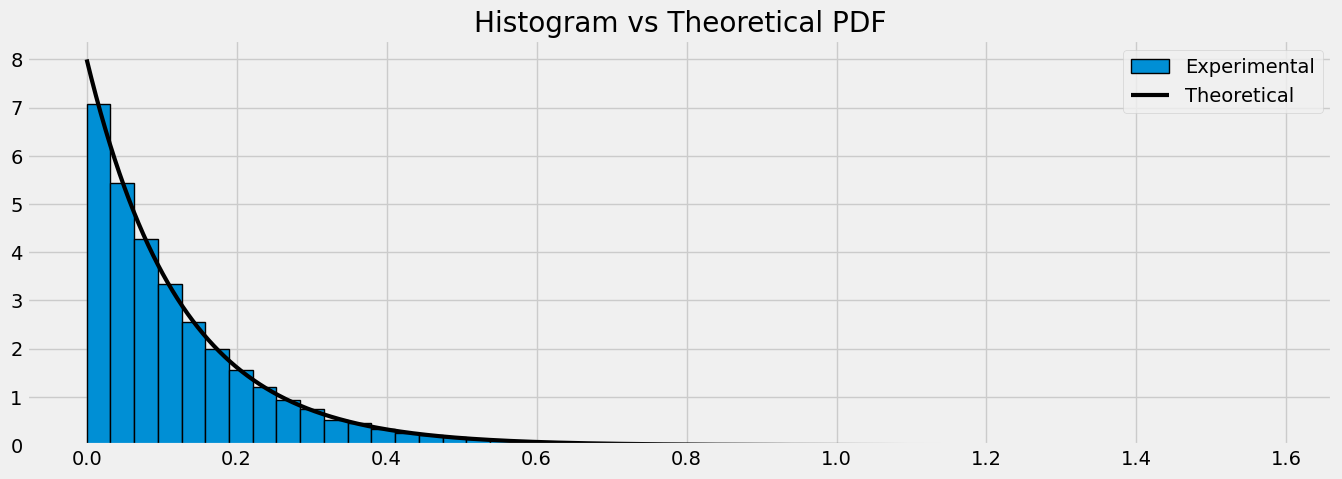

In [7]:
# Generate 100,000 samples of an exponentially distributed random variable with a mean of 8.
mean = 8        # Lamda
samples_count = 100000
total_bins = 50

samples_arr = np.random.exponential(scale=1/mean, size=samples_count)
print("Samples: ", samples_arr)
print("Total Samples: ", len(samples_arr))

fig, axs = plt.subplots(1, 1, figsize=(15, 5))

# hk: Experimental Samples, ek: Expected Samples
hk, bins_left, _ = axs.hist(x=samples_arr, bins=total_bins, density=True, edgecolor='black', linewidth=1, label="Experimental")
#Convert bins to numpy array
bins_left = np.array(bins_left)
print("Min Sample: ", np.min(samples_arr))
print("Max Sample: ", np.max(samples_arr))
binwidth = (np.diff(bins_left))[0]          #binwidth is same for all bins
bins_mid = bins_left + binwidth/2           #Generate bin_mid array containing midpoint of all bins
bins_mid = bins_mid[:-1]                    #Droppping Last Element of bin_mid since bins have extra element right edge of last bin
total_bins = len(bins_mid)                  #Should be equal to total_bins defined earlier
print("Total Bins: ", total_bins)
print("Binwidth: ", binwidth)
print("1st Bin Left Edge: ", bins_left[0])
print("1st Bin Midpoint: ", bins_mid[0])
print("1st Bin Right Edge: ", bins_left[1])
print("{total_bins}th Bin Left Edge: {value}".format(total_bins=total_bins, value=bins_left[total_bins-1]))
print("{total_bins}th Bin Midpoint: {value}".format(total_bins=total_bins, value=bins_mid[total_bins-1]))
print("{total_bins}th Bin Right Edge: {value}".format(total_bins=total_bins, value=bins_left[total_bins]))

#Generate Expected samples using distribution for each bid midpoint
ek = exp_f(bins_mid, mean)
print("1st Expected Value: ", ek[0])
print("1st Experimental Value: ", hk[0])
print("{total_bins}th Expected Value: {value}".format(total_bins=total_bins, value=ek[total_bins-1]))
print("{total_bins}th Experimental Value: {value}".format(total_bins=total_bins, value=hk[total_bins-1]))


#Bins much have atleast 10% of number of samples.
#Need to merge bins based on value
bins_mid_merged, hk_merged = merge_bins(bins_mid, hk, samples_count, True)
total_bins_merged = len(bins_mid_merged)
ek_merged = exp_f(bins_mid_merged, mean)

print("---------After Bin Merge----------------------------")
print("Total Bins After Merge: ", len(bins_mid_merged))
print("1st Expected Value: ", ek_merged[0])
print("1st Experimental Value: ", hk_merged[0])
print("{total_bins}th Expected Value: {value}".format(total_bins=total_bins_merged, value=ek[total_bins_merged-1]))
print("{total_bins}th Experimental Value: {value}".format(total_bins=total_bins_merged, value=hk[total_bins_merged-1]))


C = np.sum(((hk_merged - ek_merged)**2)/ek_merged)
DOF = len(hk_merged) - 2                           
print("C: ", C)
print("DOF: ", DOF)

#Get Confidance Value
p_value = 1 - scipy.stats.chi2.cdf(C, DOF)
print("\033[92m\033[1mConfidence: {p_value} \033[0m".format(p_value=p_value))


# area = sum(np.diff(bins_left)*hk)
# area = sum((binwidth)*hk)
# print("Total Area:", area)
plt.title("Histogram vs Theoretical PDF") 

x = np.linspace(np.min(samples_arr), np.max(samples_arr), samples_count)
axs.plot(x, exp_f(x, 8), color='black', linewidth=3, label="Theoretical")
axs.legend()

plt.style.use('fivethirtyeight')
plt.show()


## Problem 4:
Apply a Chi-squared goodness-of-fit test to the sum of 50 exponentially distributed
random vectors from Problem 2 and see if it matches a Gaussian theoretical distribu-
tion. In your PDF file, comment on what these results say about the utility of the
central limit theorem in this particular case.

Normal Mean Value:  8.334450658874635
Normal Variance Value:  1.387983981623085
Normal Standard Deviation Value:  1.1781273197847018
Min Sample:  4.202530381745119
Max Sample:  14.393129010308451
Total Bins:  50
Binwidth:  0.20381197257126704
1st Bin Left Edge:  4.202530381745119
1st Bin Midpoint:  4.304436368030753
1st Bin Right Edge:  4.406342354316386
50th Bin Left Edge: 14.189317037737187
50th Bin Midpoint: 14.29122302402282
50th Bin Right Edge: 14.393129010308451
1st Expected Value:  0.0009746403704466267
1st Experimental Value:  0.00014719449314740273
50th Expected Value: 9.515990250692109e-07
50th Expected Value: 9.812966209826976e-05
Min Sample in one bin:  5
---------After Bin Merge----------------------------
Total Bins After Merge:  46
1st Expected Value:  0.0013053308502469548
1st Experimental Value:  0.0004415834794422095
46th Expected Value: 2.4772712946734933e-05
46th Experimental Value: 0.0003434538173439412
C:  0.10654756145420191
DOF:  44
Confidence: 1.0 
Total Area: 

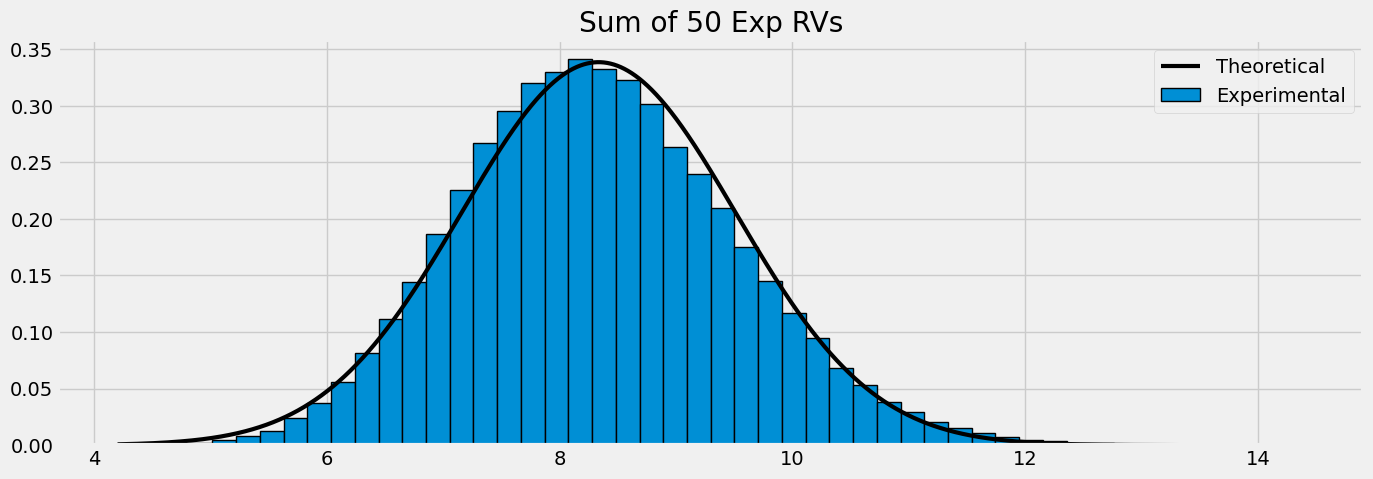

In [8]:
import math
from matplotlib.pyplot import title


mean = 6
samples_count = 100000
total_bins = 50

#For Normal Distribution
normal_mean = 0
normal_variance = 0
normal_std_dev = 0

# Sum of 50 exponentially distributed random variables
# We will also calculate mean and Std Deviation so that we can use it for normal distribution later on
# Central Limit Theorm: 
# Y_mean = X1_mean + X2_mean + ... + Xn_mean
# Y_variance = X1_variance + X2_variance + ... + Xn_variance
samples_arr_50 = 0
for counter in range(50):
    samples_arr = np.random.exponential(scale=1/mean, size=samples_count)
    normal_mean = normal_mean + np.mean(samples_arr)
    normal_variance = normal_variance + np.var(samples_arr)
    samples_arr_50 = samples_arr_50 + samples_arr

normal_std_dev = math.sqrt(normal_variance)
print("Normal Mean Value: ", normal_mean)
print("Normal Variance Value: ", normal_variance)
print("Normal Standard Deviation Value: ", normal_std_dev)

fig, axs = plt.subplots(1, 1, figsize=(15, 5))

x = np.linspace(np.min(samples_arr_50), np.max(samples_arr_50), samples_count)
axs.plot(x, normal_dist(x, normal_mean, normal_std_dev), color='black', linewidth=3, label="Theoretical")

# hk: Experimental Samples, ek: Expected Samples
hk, bins_left, _ = axs.hist(x=samples_arr_50, bins=total_bins, density=True, edgecolor='black', linewidth=1, label="Experimental")
#Convert bins to numpy array
bins_left = np.array(bins_left)
print("Min Sample: ", np.min(samples_arr_50))
print("Max Sample: ", np.max(samples_arr_50))
binwidth = (np.diff(bins_left))[0]          #binwidth is same for all bins
bins_mid = bins_left + binwidth/2           #Generate bin_mid array containing midpoint of all bins
bins_mid = bins_mid[:-1]                    #Droppping Last Element of bin_mid since bins have extra element right edge of last bin
total_bins = len(bins_mid)                  #Should be equal to total_bins defined earlier
print("Total Bins: ", total_bins)
print("Binwidth: ", binwidth)
print("1st Bin Left Edge: ", bins_left[0])
print("1st Bin Midpoint: ", bins_mid[0])
print("1st Bin Right Edge: ", bins_left[1])
print("{total_bins}th Bin Left Edge: {value}".format(total_bins=total_bins, value=bins_left[total_bins-1]))
print("{total_bins}th Bin Midpoint: {value}".format(total_bins=total_bins, value=bins_mid[total_bins-1]))
print("{total_bins}th Bin Right Edge: {value}".format(total_bins=total_bins, value=bins_left[total_bins]))


#
#Generate Expected samples using distribution for each bid midpoint
ek = normal_dist(bins_mid, normal_mean, normal_std_dev)
print("1st Expected Value: ", ek[0])
print("1st Experimental Value: ", hk[0])
print("{total_bins}th Expected Value: {value}".format(total_bins=total_bins, value=ek[total_bins-1]))
print("{total_bins}th Expected Value: {value}".format(total_bins=total_bins, value=hk[total_bins-1]))


#Bins much have atleast 10% of number of samples.
#Need to merge bins based on value
bins_mid_merged, hk_merged = merge_bins(bins_mid, hk, samples_count, True)
total_bins_merged = len(bins_mid_merged)
ek_merged = normal_dist(bins_mid_merged, normal_mean, normal_std_dev)

print("---------After Bin Merge----------------------------")
print("Total Bins After Merge: ", len(bins_mid_merged))
print("1st Expected Value: ", ek_merged[0])
print("1st Experimental Value: ", hk_merged[0])
print("{total_bins}th Expected Value: {value}".format(total_bins=total_bins_merged, value=ek[total_bins_merged-1]))
print("{total_bins}th Experimental Value: {value}".format(total_bins=total_bins_merged, value=hk[total_bins_merged-1]))


C = np.sum(((hk_merged - ek_merged)**2)/ek_merged)
DOF = len(hk_merged) - 2                           
print("C: ", C)
print("DOF: ", DOF)

#Get Confidance Value
p_value = 1 - scipy.stats.chi2.cdf(C, DOF)
print("\033[92m\033[1mConfidence: {p_value} \033[0m".format(p_value=p_value))



area = sum(np.diff(bins)*values)
print("Total Area:", area)
axs.set_title("Sum of 50 Exp RVs")
axs.legend()

plt.style.use('fivethirtyeight')
plt.show()
    

## Problem 5:
Create a 10,000 waveform ensemble of a stochastic process where the waveform is
X(t) = exp(−Y t), where Y is uniformly distributed between 0 and 3. Your time
vector should go from 0 to 4 seconds with a sampling interval of 1 ms.

Ensemble Shape:  (10000, 4000)
Plotting first 50 wavefroms from Ensemble...


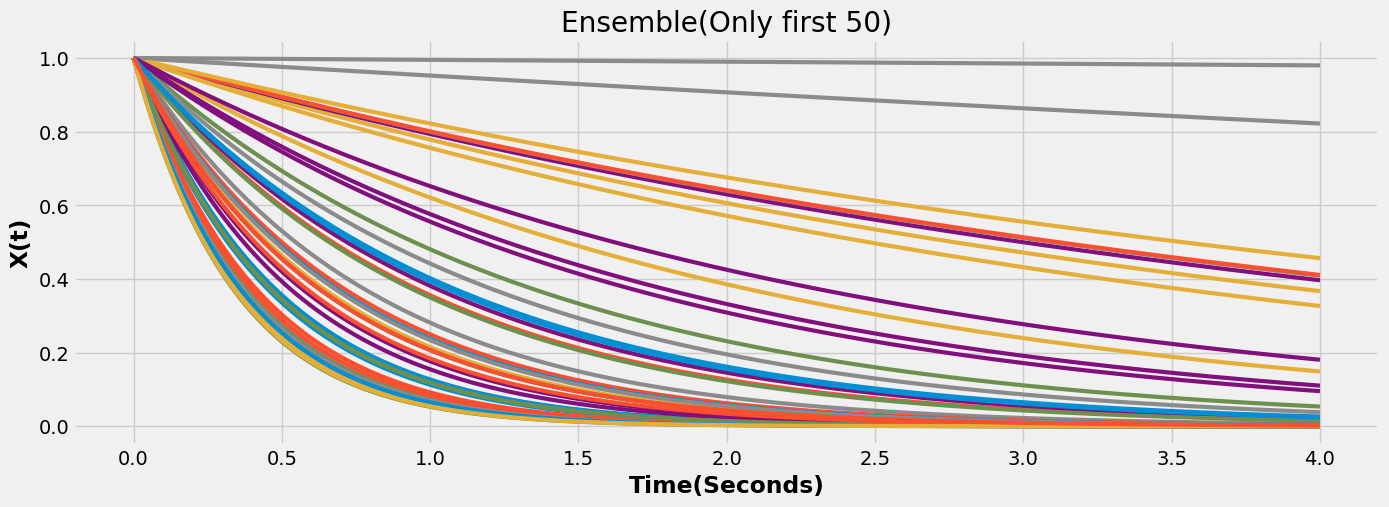

In [14]:
#Generate 10,000 samples of Y Uniformaly distributed between 0 and 3
total_wavefroms = 10000
min_time = 0            # 0 Second
max_time = 4            # 4 Second 
sampling_interval = 0.001   # 1 Milisecond
# Y is Uniformly distributed between 0 to 3: Y ~ U(0,3)
b = 3
total_time_samples = int((max_time-min_time)/sampling_interval)
Y = np.random.uniform(low=0.0, high=b, size=total_wavefroms)
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

# ensemble 2D array contains all samples for all generated waveforms
ensemble = np.zeros((total_wavefroms, total_time_samples), dtype=float)
x = np.linspace(min_time, max_time, total_time_samples)
for counter in range(total_wavefroms):
    ensemble[counter] = exp_f1(x, Y[counter])

print("Ensemble Shape: ", ensemble.shape)
print("Plotting first 50 wavefroms from Ensemble...")
for counter in range(50):
    axs.plot(x, ensemble[counter], linewidth=3) #color='black'

axs.set_xlabel('Time(Seconds)', fontweight ='bold')
axs.set_ylabel('X(t)', fontweight ='bold')
plt.style.use('fivethirtyeight')
plt.title("Ensemble(Only first 50)")
plt.show()

## Problem 6:
Use your 10,000 waveform ensemble from Problem 5 to numerically calculate a histogram that represents the first order PDF of this stochastic process. Normalize your
histogram to have the same area as a PDF and plot your histogram on the same figure
as the theoretical expression for the first order PDF for this stochastic process. They
should match. You can generate your plot for a single time sample that does a good
job of illustrating the zero and non-zero regions of the PDF.

In [10]:
# Theoretical first order pdf of Exponential process
# X(t) = exp(-Yt)
# b: Y ~ U(0,b)
# t: Timestamp
def first_order_pdf(x, b, t):
    return 1/(b*abs(t*x))

0.31523749089076203
0.3167376438773787
Samples Count:  10000
Total Area: 0.9999999999999999


Text(0.5, 1.0, 'Histogram vs Theoretical PDF (Timestamp = 1Second)')

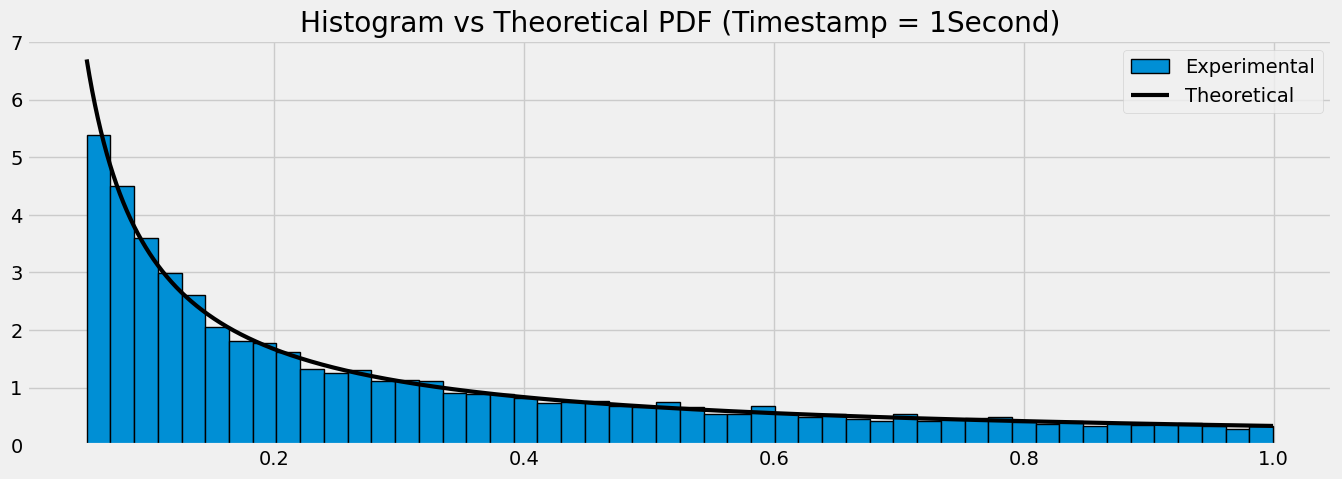

In [11]:
time_stamp = 1          #To get samples from ensembles at time_stamp=1Second
time_stamp_index = int(time_stamp/sampling_interval)
#print(time_stamp_index)

#Get 1000th column of ensemble
#samples_1000: samples at 1000ms timestamp
samples_1000 = ensemble[:, time_stamp_index]
samples_count = len(samples_1000)
print(np.mean(samples_1000))
print((1-np.exp(-3))/3)
print("Samples Count: ", samples_count)


total_bins = 50
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
values, bins, _ = axs.hist(x=samples_1000, bins=total_bins, density=True, edgecolor='black', linewidth=1, label="Experimental")
# print(sum(values))
area = sum(np.diff(bins)*values)
print("Total Area:", area)

#Plotting theoretical first order pdf at time stamp 1second
x = np.linspace(np.min(samples_1000), np.max(samples_1000), samples_count)
axs.plot(x, first_order_pdf(x, b, time_stamp), color='black', linewidth=3, label="Theoretical")
axs.legend()

plt.style.use('fivethirtyeight')
plt.title("Histogram vs Theoretical PDF (Timestamp = 1Second)")

## Problem 7:
Use your 10,000 waveform ensemble from Problem 5 to numerically calculate the mean
of the stochastic process. Plot the numerical mean along with the theoretical mean
expression on the same figure. They should match.

In [12]:
# Theoretical mean of exponential process
# X(t) = exp(-Yt)
# b: Y ~ U(0,b)
# t: Timestamp
# u(t) = 1/bt(1-exp(-bt))
def theoretical_mean(t, b):
    if(t == 0):         #to avoid divide by zero error
        return 1
    return (1-np.exp(-b*t))/(b*t)

Means shape:  (4000,)
Experimental Means:  [1.         0.99849841 0.99699981 ... 0.08170574 0.08168489 0.08166405]
Theoretical Means:  [1.         0.9985015  0.99700599 ... 0.08339536 0.08337451 0.08335366]


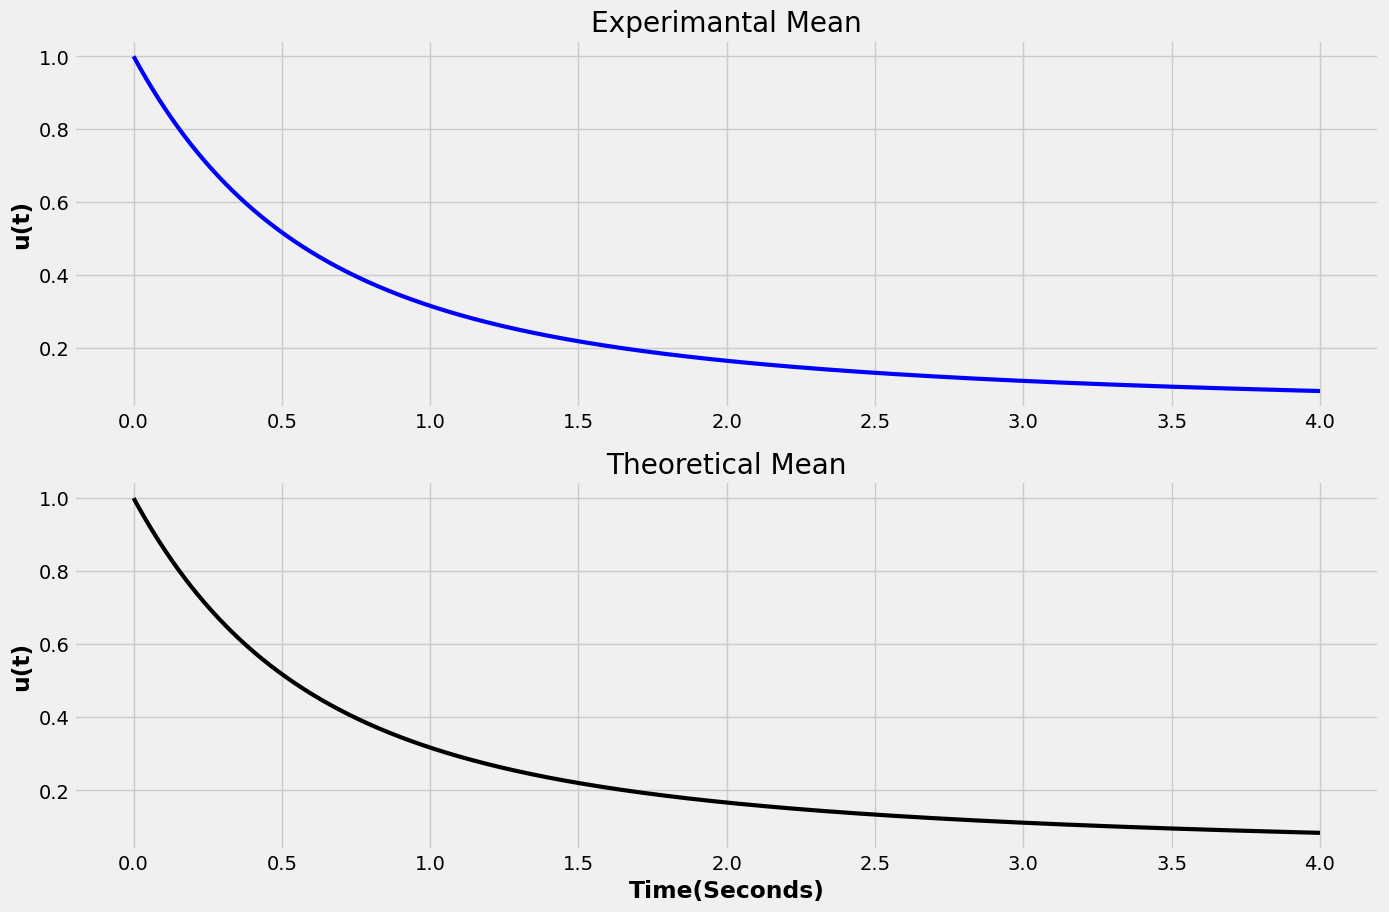

In [13]:

# Calculate mean at each timestamp from ensembles
mean_experimental = np.zeros(total_time_samples, dtype=float)
mean_theoretical = np.zeros(total_time_samples, dtype=float)
for time_stamp in range(total_time_samples):
    mean_experimental[time_stamp] = np.mean(ensemble[:, time_stamp])
    mean_theoretical[time_stamp] = theoretical_mean(time_stamp*sampling_interval, b)
print("Means shape: ", mean_experimental.shape)
print("Experimental Means: ", mean_experimental)
print("Theoretical Means: ", mean_theoretical)

#Plotting theoretical mean vs experimental mean for each time stamp
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
x = np.linspace(min_time, max_time, total_time_samples)
axs[0].plot(x, mean_experimental, color='blue', linewidth=3)
axs[0].set_title("Experimantal Mean")

axs[1].plot(x, mean_theoretical, color='black', linewidth=3)
axs[1].set_title("Theoretical Mean")

axs[1].set_xlabel('Time(Seconds)', fontweight ='bold')
axs[0].set_ylabel('u(t)', fontweight ='bold')
axs[1].set_ylabel('u(t)', fontweight ='bold')

plt.style.use('fivethirtyeight')
